<a href="https://colab.research.google.com/github/puff-tw/1017/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://upload.wikimedia.org/wikipedia/commons/3/3f/Bikesgray.jpg"
urlretrieve(url, "test.jpg")


('test.jpg', <http.client.HTTPMessage at 0x7f860129d190>)

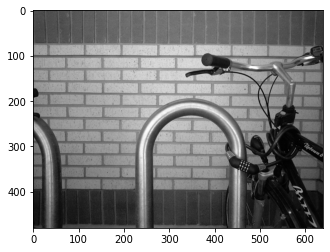

In [2]:
# demo灰白
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("test.jpg")
img_np = np.array(img)
plt.imshow(img_np, cmap="gray")


In [3]:
# demo用的彩色圖片
url = "https://i.ytimg.com/vi/Opp9nqiN5m0/maxresdefault.jpg"
urlretrieve(url, "color.jpg")


('color.jpg', <http.client.HTTPMessage at 0x7f85fd0bac90>)

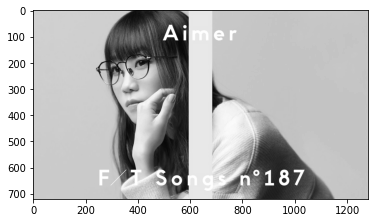

In [4]:
# to gray manually
# https://pillow.readthedocs.io/en/stable/_modules/PIL/Image.html#Image.convert
img_color = Image.open("color.jpg")
# RGB, RGBA, L(gray)
# img_color.convert("L")
img_color_np = np.array(img_color) / 255.0
shape = img_color_np.shape
# 保存我灰階圖片
img_np = np.zeros(shape[:2])
for i in range(shape[0]):
    for j in range(shape[1]):
        r, g, b = img_color_np[i][j]
        img_np[i][j] = 0.299 * r + 0.587 * g + 0.114 * b
plt.imshow(img_np, cmap="gray")


In [5]:
# Gx
shape = img_np.shape
img_gx = np.zeros(shape)
Gx = [
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
]
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # target
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gx[addi+1][addj+1] * img_np[ti][tj]
        img_gx[ci][cj] = abs(newvalue)
img_gx


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01568627, 0.16862745,
        0.        ],
       [0.        , 0.00392157, 0.        , ..., 0.01568627, 0.16078431,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.01568627, 0.15686275,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01568627, 0.15686275,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

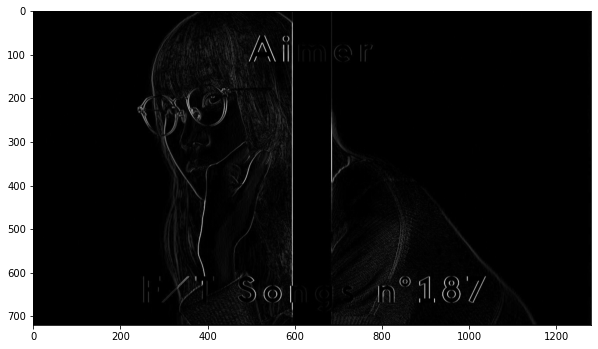

In [6]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gx.max(), img_gx.min()
img_gx_scale = (img_gx - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gx_scale, cmap="gray")


In [7]:
# Gy
shape = img_np.shape
img_gy = np.zeros(shape)
Gy = [
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
]
for i in range(1, shape[0]-1):
    for j in range(1, shape[1]-1):
        # 中心
        ci, cj = i, j
        newvalue = 0
        for addi in [-1, 0, 1]:
            for addj in [-1, 0, 1]:
                # target
                ti, tj = ci+addi, cj+addj
                newvalue = newvalue + Gy[addi+1][addj+1] * img_np[ti][tj]
        img_gy[ci][cj] = abs(newvalue)
img_gy


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.25490196e-01, 1.25490196e-01, ...,
        1.64705882e-01, 1.68627451e-01, 0.00000000e+00],
       [0.00000000e+00, 9.80392157e-02, 9.41176471e-02, ...,
        1.56862745e-02, 1.96078431e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, ...,
        1.11022302e-16, 1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, ...,
        1.11022302e-16, 1.11022302e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

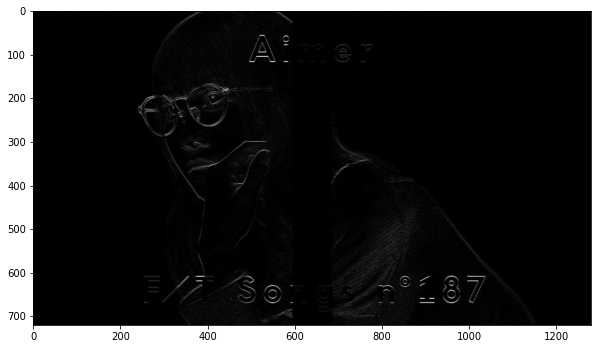

In [8]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_gy.max(), img_gy.min()
img_gy_scale = (img_gy - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_gy_scale, cmap="gray")


In [9]:
img_sobel = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        img_sobel[i][j] = (img_gx[i][j] ** 2 + img_gy[i][j] ** 2) ** 0.5
img_sobel


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.25490196e-01, 1.25490196e-01, ...,
        1.65451162e-01, 2.38475228e-01, 0.00000000e+00],
       [0.00000000e+00, 9.81176157e-02, 9.41176471e-02, ...,
        2.21837422e-02, 1.61975501e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, ...,
        1.56862745e-02, 1.56862745e-01, 0.00000000e+00],
       [0.00000000e+00, 2.22044605e-16, 2.22044605e-16, ...,
        1.56862745e-02, 1.56862745e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

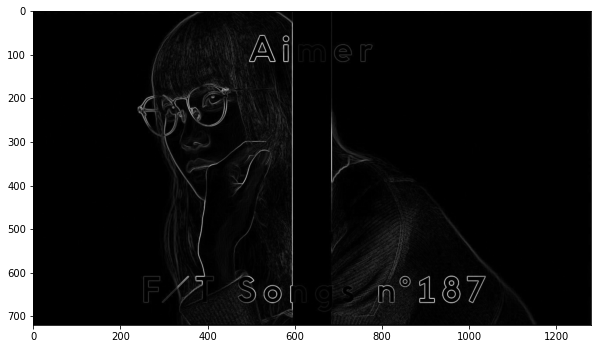

In [10]:
# 0-255 0.0-1.0 這兩種都可以直接使用matplotlib畫
ma, mi = img_sobel.max(), img_sobel.min()
img_sobel_scale = (img_sobel - mi) / (ma - mi)
plt.figure(figsize=(10, 10))
plt.imshow(img_sobel_scale, cmap="gray")
